In [31]:
import numpy as np
import pandas as ps
from copy import deepcopy
from random import randint
from matplotlib import pyplot

from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [38]:
def kmeans(x, c_positions, number_of_clusters):
    clusters = np.zeros(len(x))
    old_clusters = np.zeros(c_positions.shape)
    error = 1
    while error != 0:
        for i in range(len(x)):
            distances = [distance(x[i], c) for c in c_positions]
            cluster = np.argmin(distances)
            clusters[i] = cluster        
        
        old_clusters = deepcopy(c_positions)
    
        for j in range(0, number_of_clusters):
            points = [x[n] for n in range(len(x)) if clusters[n] == j]
            c_positions[j] = np.mean(points, axis=0)        
        
        error = distance(c_positions, old_clusters)
        
    return c_positions, clusters

def distance(a, b):
    return np.linalg.norm(a - b)

def distance_2(a,b):
    squared_distance = 0
    for i in range(len(a)):
        squared_distance += (a[i] - b[i])**2
    dist = sqrt(squared_distances)
    return dist

def generate_random_clusters(n_features, k):
    c_position = []
    for i in range(n_features):
        c_position.append(np.random.randint(0.8 * np.min(x[:, i]), 0.8 * np.max(x[:, i]), size=k)) 
    return c_position

def error(c, c_old):
    return distance(c, c_old)

def plot_in_col(x, number_of_clusters, p, new_clusters):
    for i in range(number_of_clusters):
        col_points = np.array([x[n] for n in range(len(x)) if p[n] == i])
        pyplot.scatter(col_points[:, 0], col_points[:, 1], s=10)
    pyplot.scatter(new_clusters[:, 0], new_clusters[:, 1], marker='*', s=300, c='r')
    pyplot.show()

In [24]:
def gen_fake_data():
    fake_centers = 4

    x, y = make_blobs(n_samples=5000, centers=fake_centers, n_features=2, random_state=195)

    x2 = deepcopy(x)
    y2 = deepcopy(y)
    return x, x2, y2, fake_centers

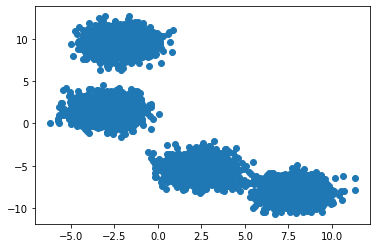

In [25]:
x, xx, yy, nclust = gen_fake_data()

# plot regression dataset
%matplotlib inline
pyplot.scatter(x[:, 0], x[:, 1])
pyplot.show()

In [27]:
n_features = 2
c_positions = generate_random_clusters(n_features, nclust) 
c_positions = np.array(c_positions).T

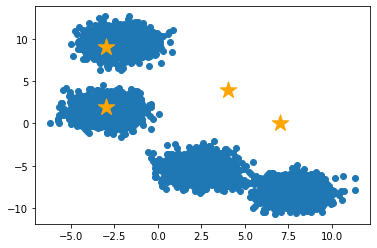

In [28]:
pyplot.scatter(x[:, 0], x[:, 1])
pyplot.scatter(c_positions[:, 0], c_positions[:, 1], marker='*', s=300, c='orange')
pyplot.show()

In [35]:
new_clusters, p = kmeans(x, c_positions, nclust)

In [37]:
print(new_clusters)

[[         -2           1]
 [          5          -6]
 [         -2           9]
 [-2147483648 -2147483648]]


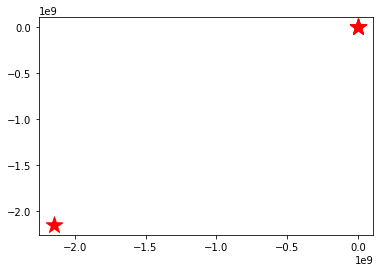

In [36]:
pyplot.scatter(x[:, 0], x[:, 1])
pyplot.scatter(new_clusters[:, 0], new_clusters[:, 1], marker='*', s=300, c='r')
pyplot.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

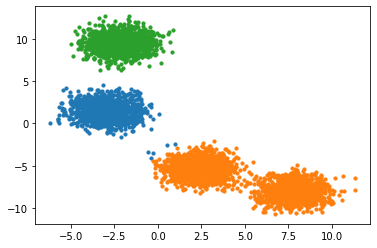

In [40]:
plot_in_col(x, nclust, p, new_clusters)

# OLD 

In [3]:
X, y = make_blobs(n_samples=10, centers=3, n_features=2, random_state=0)

In [11]:
X

array([[ 1.12031365,  5.75806083],
       [ 1.7373078 ,  4.42546234],
       [ 2.36833522,  0.04356792],
       [ 0.87305123,  4.71438583],
       [-0.66246781,  2.17571724],
       [ 0.74285061,  1.46351659],
       [-4.07989383,  3.57150086],
       [ 3.54934659,  0.6925054 ],
       [ 2.49913075,  1.23133799],
       [ 1.9263585 ,  4.15243012]])

In [ ]:
def kmeans(x, K, n_init):
    # x: input data
    # K: number of centroids
    # n_init: the number of initial guesses for the centroids
    return centroids, labels

def euclidean_distance(point1, point2):
    '''
    point1 and point2 are np arrays 
    '''
    temp = point1 - point2
    sum_sq = np.dot(temp.T, temp)
    #print(np.sqrt(sum_sq))
    return np.sqrt(sum_sq)
    

In [13]:
'''
centroids = k = 
n_init = number of iterations
'''
def kmeans(x, k, n_init):
    #n_init = 1
    if n_init <= 0: n_init = 1 # gaurd 
        
    cluster = np.zeros(x.shape[0])
    #centroids = data.sample(n=k).values
    centroids = x
    
    while n_init:
        # for each observation
        for i, row in enumerate(x):
            mn_dist = float('inf')
        # dist of the point from all centroids
        for idx, centroid in enumerate(centroids):
            d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
            # store closest centroid
            if mn_dist > d:
                mn_dist = d
                cluster[i] = idx
    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
        n_init = 0
    else:
        centroids = new_centroids
    return centroids, cluster

AttributeError: 'numpy.ndarray' object has no attribute 'values'